# Cardiotocography Classification (ANN)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Concatenate

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# Load data all feature
dataset = np.loadtxt("ctg.csv", delimiter=",")
# Load data selected feature
dataset_sel = np.loadtxt("ctg_sel.csv", delimiter=",")

In [4]:
# split into input (X) and output (Y) variables
# all feature
X = dataset[:,0:21]
y = dataset[:,21]
# selected feature
X_sel = dataset_sel[:,0:19]
y_sel = dataset_sel[:,19]

In [5]:
# encode target
encoder = LabelEncoder()
# all feature
encoded_y = encoder.fit_transform(y)
dummy_y = utils.to_categorical(encoded_y)
#selected feature
encoded_y_sel = encoder.fit_transform(y_sel)
dummy_y_sel = utils.to_categorical(encoded_y_sel)

In [6]:
#train test split data all feature
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, stratify=np.array(y),random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=np.array(y_train),random_state=1)
#train test split data selected feature
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, dummy_y_sel, test_size=0.2, stratify=np.array(y_sel),random_state=1)
X_train_sel, X_val_sel, y_train_sel, y_val_sel = train_test_split(X_train_sel, y_train_sel, test_size=0.25, stratify=np.array(y_train_sel),random_state=1)

## Train Model ANN (Selected Feature)

In [7]:
visible = Input(shape=(19,))
hidden1 = Dense(14, activation='relu')(visible)
hidden2 = Dense(9, activation='relu')(hidden1)
hidden3 = Dense(6, activation='relu')(hidden2)
concat = Concatenate()([visible, hidden3])
output = Dense(3, activation='softmax')(concat)
model=Model(inputs=visible, outputs=output)

In [8]:
#compile model
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.save("model.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5",save_best_only=True)
# fit the model
history = model.fit(x=X_train_sel, y=y_train_sel,
                     validation_data=(X_val_sel, y_val_sel),
                     callbacks=[checkpoint_cb],
                     batch_size=8, epochs=100)

Epoch 1/100
160/160 [==============================] - 1s 7ms/step - loss: 1.6061 - accuracy: 0.5843 - val_loss: 1.5169 - val_accuracy: 0.7459
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.9465 - accuracy: 0.8141 - val_loss: 0.8615 - val_accuracy: 0.8400
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5714 - accuracy: 0.8588 - val_loss: 0.5663 - val_accuracy: 0.8424
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8776 - val_loss: 0.4385 - val_accuracy: 0.8612
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3328 - accuracy: 0.8878 - val_loss: 0.3610 - val_accuracy: 0.8494
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8933 - val_loss: 0.4010 - val_accuracy: 0.8494
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8973 - val_loss: 0.3619 - val_accuracy: 0.8494

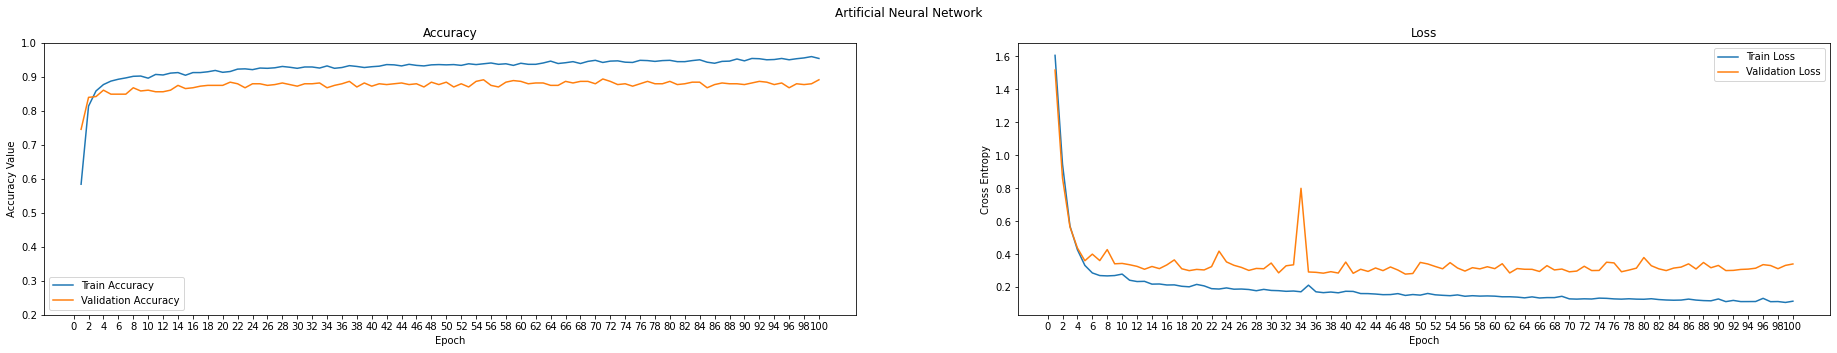

In [10]:
epoch_list = list(range(1,101)) # EPOCH = 100
y_train_acc = history.history['accuracy']
y_val_acc = history.history['val_accuracy']
y_train_loss = history.history['loss']
y_val_loss = history.history['val_loss']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,5))
t = f.suptitle('Artificial Neural Network', fontsize=12)

ax1.plot(epoch_list, y_train_acc, label='Train Accuracy')
ax1.plot(epoch_list, y_val_acc, label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 2))
ax1.set_ylim(0.2,1)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, y_train_loss, label='Train Loss')
ax2.plot(epoch_list, y_val_loss, label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 2))
#ax2.set_ylim(0,1)
ax2.set_ylabel('Cross Entropy')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [11]:
print("Max ANN Validation Acc :",max(y_val_acc),"pada epoch =",y_val_acc.index(max(y_val_acc))+1)

Max ANN Validation Acc : 0.8941176533699036 pada epoch = 71


In [12]:
y_pred = model.predict(X_test_sel)
y_pred = (y_pred > 0.5)

In [13]:
accuracy = accuracy_score(y_test_sel, y_pred)
precision = precision_score(y_test_sel,  y_pred,average='macro')
recall = recall_score(y_test_sel,  y_pred,average='macro')
f1 =  f1_score(y_test_sel,  y_pred,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f ' % (precision*100))
print('Recall: %.3f ' % (recall*100))
print('F1 Score: %.3f ' % (f1*100))

Accuracy: 94.366 
Precision: 91.915 
Recall: 88.143 
F1 Score: 89.948 


Text(33.0, 0.5, 'True Value')

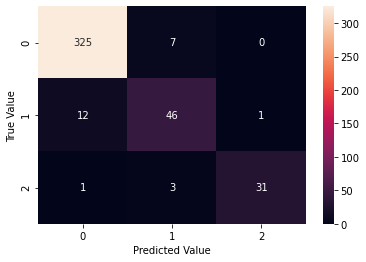

In [14]:
matrix_model=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(matrix_model, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

## Train Model ANN (All Feature)

In [15]:
visible = Input(shape=(21,))
hidden1 = Dense(14, activation='relu')(visible)
hidden2 = Dense(9, activation='relu')(hidden1)
hidden3 = Dense(6, activation='relu')(hidden2)
concat = Concatenate()([visible, hidden3])
output = Dense(3, activation='softmax')(concat)
model_all=Model(inputs=visible, outputs=output)

In [16]:
#compile model
model_all.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model_all.save("model.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5",save_best_only=True)
# fit the model
history_all = model_all.fit(x=X_train, y=y_train,
                     validation_data=(X_val, y_val),
                     callbacks=[checkpoint_cb],
                     batch_size=8, epochs=100)

Epoch 1/100
160/160 [==============================] - 1s 7ms/step - loss: 1.5875 - accuracy: 0.5012 - val_loss: 1.0300 - val_accuracy: 0.7176
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.8173 - val_loss: 0.6009 - val_accuracy: 0.8329
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4852 - accuracy: 0.8580 - val_loss: 0.4851 - val_accuracy: 0.8424
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8627 - val_loss: 0.3973 - val_accuracy: 0.8541
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8800 - val_loss: 0.3696 - val_accuracy: 0.8541
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2892 - accuracy: 0.8878 - val_loss: 0.3818 - val_accuracy: 0.8565
Epoch 7/100
160/160 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.8965 - val_loss: 0.3342 - val_accuracy: 0.8588

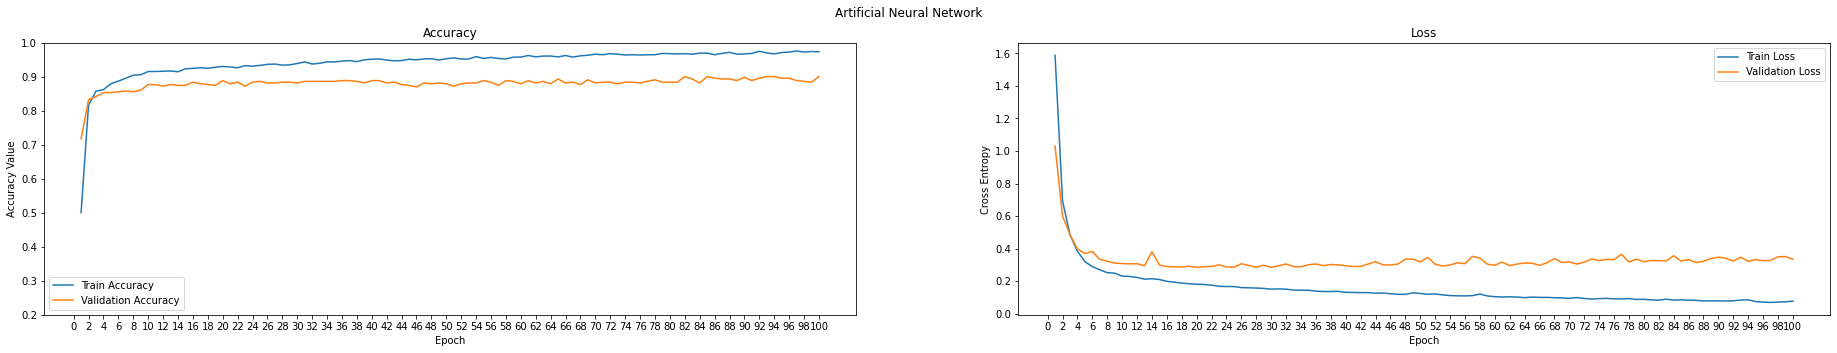

In [18]:
epoch_list = list(range(1,101)) # EPOCH = 100
y_train_acc = history_all.history['accuracy']
y_val_acc = history_all.history['val_accuracy']
y_train_loss = history_all.history['loss']
y_val_loss = history_all.history['val_loss']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(32,5))
t = f.suptitle('Artificial Neural Network', fontsize=12)

ax1.plot(epoch_list, y_train_acc, label='Train Accuracy')
ax1.plot(epoch_list, y_val_acc, label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 2))
ax1.set_ylim(0.2,1)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, y_train_loss, label='Train Loss')
ax2.plot(epoch_list, y_val_loss, label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 2))
#ax2.set_ylim(0,1)
ax2.set_ylabel('Cross Entropy')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [19]:
print("Max ANN Validation Acc :",max(y_val_acc),"pada epoch =",y_val_acc.index(max(y_val_acc))+1)

Max ANN Validation Acc : 0.9011764526367188 pada epoch = 82


In [20]:
y_pred_all = model_all.predict(X_test)
y_pred_all = (y_pred_all > 0.5)

In [21]:
accuracy = accuracy_score(y_test, y_pred_all)
precision = precision_score(y_test,  y_pred_all,average='macro')
recall = recall_score(y_test,  y_pred_all,average='macro')
f1 =  f1_score(y_test,  y_pred_all,average='macro')
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f ' % (precision*100))
print('Recall: %.3f ' % (recall*100))
print('F1 Score: %.3f ' % (f1*100))

Accuracy: 93.427 
Precision: 89.969 
Recall: 88.052 
F1 Score: 88.899 


Text(33.0, 0.5, 'True Value')

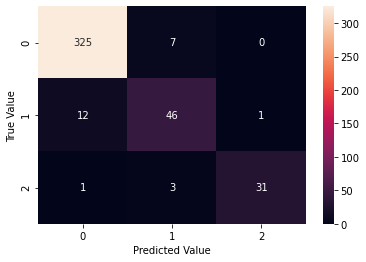

In [22]:
matrix_model2=confusion_matrix(y_test.argmax(axis=1), y_pred_all.argmax(axis=1))
sns.heatmap(matrix_model2, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [ ]:
plot_model(model)

In [ ]:
plot_model(model_all)